Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import os


RENAME IMAGE FILES

In [2]:
"""
folder_path = r"Data\Very mild Dementia" 
file_list = os.listdir(folder_path)

#sort files 
file_list.sort()

for idx, filename in enumerate(file_list):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        old_path = os.path.join(folder_path, filename)
        new_filename = f"image_{idx}.jpg"  
        new_path = os.path.join(folder_path, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_filename}")
"""


'\nfolder_path = r"Data\\Very mild Dementia" \nfile_list = os.listdir(folder_path)\n\n#sort files \nfile_list.sort()\n\nfor idx, filename in enumerate(file_list):\n    if filename.lower().endswith((".jpg", ".jpeg", ".png")):\n        old_path = os.path.join(folder_path, filename)\n        new_filename = f"image_{idx}.jpg"  \n        new_path = os.path.join(folder_path, new_filename)\n        os.rename(old_path, new_path)\n        print(f"Renamed: {filename} -> {new_filename}")\n'

**IMAGE PRE-PROCESSING**

In [4]:
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


#size of each image folders
MD_size = len(os.listdir(r"Data\Mild Dementia"))
ND_size = len(os.listdir(r"Data\Non Demented"))
MoD_size = len(os.listdir(r"Data\Moderate Dementia"))
VMD_size = len(os.listdir(r"Data\Very mild Dementia"))



ImagesMD = []
  
for key in range(MD_size):
    img = load_img(rf"Data\Mild Dementia\image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    ImagesMD.append(img_array)

MD_img = pd.DataFrame({"Images":ImagesMD})




ImagesND = []
  
for key in range(ND_size):
    img = load_img(rf"Data\Non Demented\image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    ImagesND.append(img_array)

ND_img = pd.DataFrame({"Images":ImagesND})


ImagesMoD = []
  
for key in range(MoD_size):
    img = load_img(rf"Data\Moderate Dementia\image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    ImagesMoD.append(img_array)
MoD_img = pd.DataFrame({"Images":ImagesMoD})


ImagesVMD = []
  
for key in range(VMD_size):
    img = load_img(rf"Data\Very mild Dementia\image_{key}.jpg").convert("RGB")
    img_resized = img.resize((128, 128), Image.Resampling.LANCZOS)
    img_array = img_to_array(img_resized).astype(np.uint8)
    ImagesVMD.append(img_array)
VMD_img = pd.DataFrame({"Images":ImagesVMD})





#MD_img

MD_ = pd.DataFrame({"label": np.array(["MD" for key in range(MD_size)])})
MD_df = pd.concat([MD_img, MD_], axis = 1).sort_index()

#ND_img

ND_ = pd.DataFrame({"label": np.array(["ND" for key in range(ND_size)])})
ND_df = pd.concat([ND_img, ND_], axis = 1).sort_index()


#MoD_img

MoD_ = pd.DataFrame({"label": np.array(["MoD" for key in range(MoD_size)])})
MoD_df = pd.concat([MoD_img, MoD_], axis = 1).sort_index()


#VMD_img

VMD_ = pd.DataFrame({"label": np.array(["VMD" for key in range(VMD_size)])})
VMD_df = pd.concat([VMD_img, VMD_], axis = 1).sort_index()

 split into training and testing datasets

In [5]:
#concat
DATA = pd.concat([MD_df, ND_df, MoD_df, VMD_df]).reset_index().drop("index", axis= 1)

In [6]:
#ENCODING label
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
DATA["label"] = encoder.fit_transform(DATA["label"])



#encoder.classes_
DATA["label"].nunique()

4

In [7]:
X = DATA["Images"]
Y = DATA["label"]
"""
Split datasets into train, valid, test
"""
from sklearn.model_selection import train_test_split

x_train, x_check, y_train, y_check = train_test_split(X, Y, test_size = 0.3, random_state = 41, stratify = Y)

#split the check datasets into test and validation
x_test, x_val, y_test, y_val = train_test_split(x_check, y_check, test_size = 0.2, random_state = 41, stratify = y_check)

Chunk Sizes

In [8]:
#chunking sizes

batch_size = 32
x_train_scaled = []
x_test_scaled = []
x_val_scaled = []

for i in range(0, len(x_train), batch_size):
    batch = np.stack(x_train.values[i:i+batch_size]).astype(np.float32) / 255.0
    x_train_scaled.append(batch)

x_train_scaled = np.concatenate(x_train_scaled)



for i in range(0, len(x_test), batch_size):
    batch = np.stack(x_test.values[i:i+batch_size]).astype(np.float32) / 255.0
    x_test_scaled.append(batch)

x_test_scaled = np.concatenate(x_test_scaled)



for i in range(0, len(x_val), batch_size):
    batch = np.stack(x_val.values[i:i+batch_size]).astype(np.float32) / 255.0
    x_val_scaled.append(batch)

x_val_scaled = np.concatenate(x_val_scaled)


In [9]:
x_train_scaled

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

Load the pretrained model

In [10]:
#pretrained model
from tensorflow.keras.models import load_model, Model
base_model = load_model("MRI_SCAN_CLASSIFIER.h5")

#load its inputs
base_model.inputs
base_model.layers
Feature_extractor = Model(inputs = base_model.inputs, outputs = base_model.get_layer("max_pooling2d_2").output)

#freeze the layers
Feature_extractor.trainable = False

CNN ARCHITECTURE

In [11]:
#without regularization
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, tanh, sigmoid, softmax
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Flatten, Dense, InputLayer, Conv2D, MaxPool2D

model = Sequential([
    #pretrained 
    Feature_extractor,
    
    #flatten
    Flatten(),

    #hidden layer
    Dense(units= 128, activation= relu),

    #output
    Dense(units= 4, activation= softmax)
    


])

compiling model

In [ ]:
model.compile(optimizer= Adam(learning_rate= 0.0001), loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])

Train model

In [ ]:
#train model
History = model.fit(x= x_train_scaled, y= y_train, validation_data= (x_val_scaled, y_val), epochs= 5)

Epoch 1/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 193s 171ms/step - accuracy: 0.7827 - loss: 0.5441 - val_accuracy: 0.9796 - val_loss: 0.1448
Epoch 2/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 170s 158ms/step - accuracy: 0.9792 - loss: 0.1170 - val_accuracy: 0.9969 - val_loss: 0.0476
Epoch 3/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 167s 154ms/step - accuracy: 0.9978 - loss: 0.0391 - val_accuracy: 0.9990 - val_loss: 0.0199
Epoch 4/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 161s 150ms/step - accuracy: 0.9995 - loss: 0.0163 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 5/5
1072/1072 ━━━━━━━━━━━━━━━━━━━━ 162s 151ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0072


Check for Overfitting

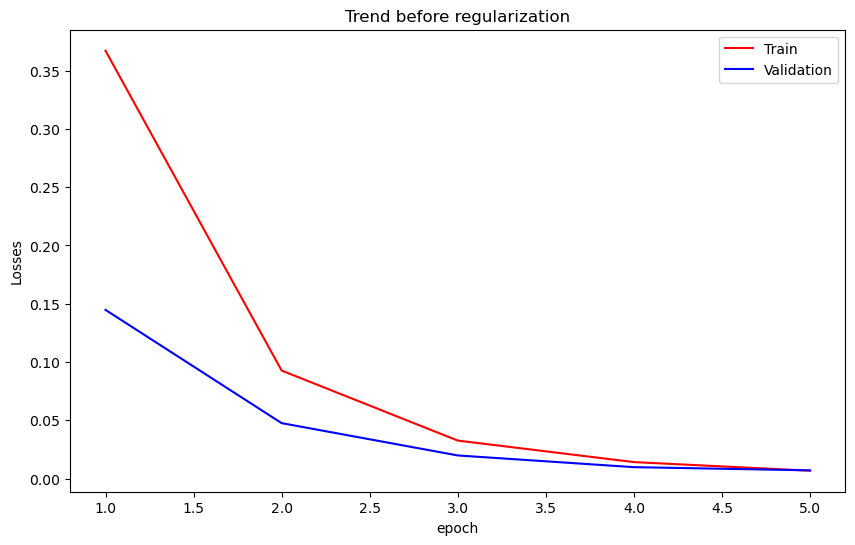

In [ ]:
train_loss = History.history["loss"]
val_loss = History.history["val_loss"]
epoch = np.arange(5)+1

plt.figure(figsize = (10,6))
plt.plot(epoch, train_loss, "r", label = "Train")
plt.plot(epoch, val_loss, "b", label = "Validation")
plt.xlabel("epoch")
plt.ylabel("Losses")
plt.title("Trend before regularization")
plt.legend()

Model prediction

In [ ]:
#predict
pred = model.predict(x_test_scaled)

from aargmax import Argmax
argmax = Argmax(pred)
argmax.get_arg()
pred_max = argmax.print_list()

368/368 ━━━━━━━━━━━━━━━━━━━━ 42s 114ms/step


In [ ]:
#evaluate model on validation set
model.evaluate(x_val_scaled, y_val)

92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 1.0000 - loss: 0.0067


[0.007155760191380978, 1.0]

Metrics

In [ ]:
#get metrics
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score

print(confusion_matrix(y_test, pred_max))

print("\n\n")

print(classification_report(y_test, pred_max))

#print F2 score
print(f"f2_score = {fbeta_score(y_test, pred_max, beta= 0.5, average = 'macro')}")

[[1201    0    0    0]
 [   0  117    0    0]
 [   0    0 7142    3]
 [   0    0    2 3292]]



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1201
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00      7145
           3       1.00      1.00      1.00      3294

    accuracy                           1.00     11757
   macro avg       1.00      1.00      1.00     11757
weighted avg       1.00      1.00      1.00     11757

f2_score = 0.9997105584820201
